Cyna Shirazinejad, 7/7/21

# Notebook 15: analyze scission-present nwasp+ CCPs, 'zero' padding

outline:
* comparison of lifetimes of nwasp+/- CCPs
* comparison of aligned intensities of nwasp+/- CCPs

##### import all necessary Python modules

In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pickle
from IPython.display import Image
from scipy import signal
import scipy.stats as stats
import seaborn as sns

analysis_metadata = np.load('analysis_metadata.npy', allow_pickle=True)
sys.path.append(analysis_metadata.item().get('path_notebook')+'/cmeAnalysisPostProcessingSimplified') # add custom Python scripts to the local path
import generate_index_dictionary
import return_track_attributes
import display_tracks
index_dictionary = generate_index_dictionary.return_index_dictionary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load files

In [13]:
experiment = 'adw_wildtype'

In [14]:
path_outputs = analysis_metadata.item().get('path_outputs')

In [15]:
with open(path_outputs+'/dataframes/'+experiment+'_merged_ccp_attributes', 'rb') as f:
    merged_results = pickle.load(f)  


ccps_nwasp_negative = np.load(path_outputs+'/dataframes/'+experiment+'_merged_nwasp_negative_ccps.npy', allow_pickle=True)
    
ccps_nwasp_positive = np.load(path_outputs+'/dataframes/'+experiment+'_merged_nwasp_positive_ccps.npy', allow_pickle=True)
    
ap2_lifetime_nwasp_negative = merged_results['ap2_lifetime_nwasp_negative']
ap2_lifetime_nwasp_positive = np.array(merged_results['ap2_lifetime_nwasp_positive'])
time_ap2_appearance_to_dnm2_peak_nwasp_negative = merged_results['time_ap2_appearance_to_dnm2_peak_nwasp_negative']
time_ap2_appearance_to_dnm2_peak_nwasp_positive = np.array(merged_results['time_ap2_appearance_to_dnm2_peak_nwasp_positive'])
time_nwasp_appearance_to_dnm2_peak_nwasp_positive = np.array(merged_results['time_nwasp_appearance_to_dnm2_peak_nwasp_positive'])
nwasp_lifetime_nwasp_positive = np.array(merged_results['nwasp_lifetime_nwasp_positive'])
ap2_nwasp_separation_at_dnm2_peak_nwasp_positive = np.array(merged_results['ap2_nwasp_separation_at_dnm2_peak_nwasp_positive'])

# AP2 lifetimes of nwasp+/- events

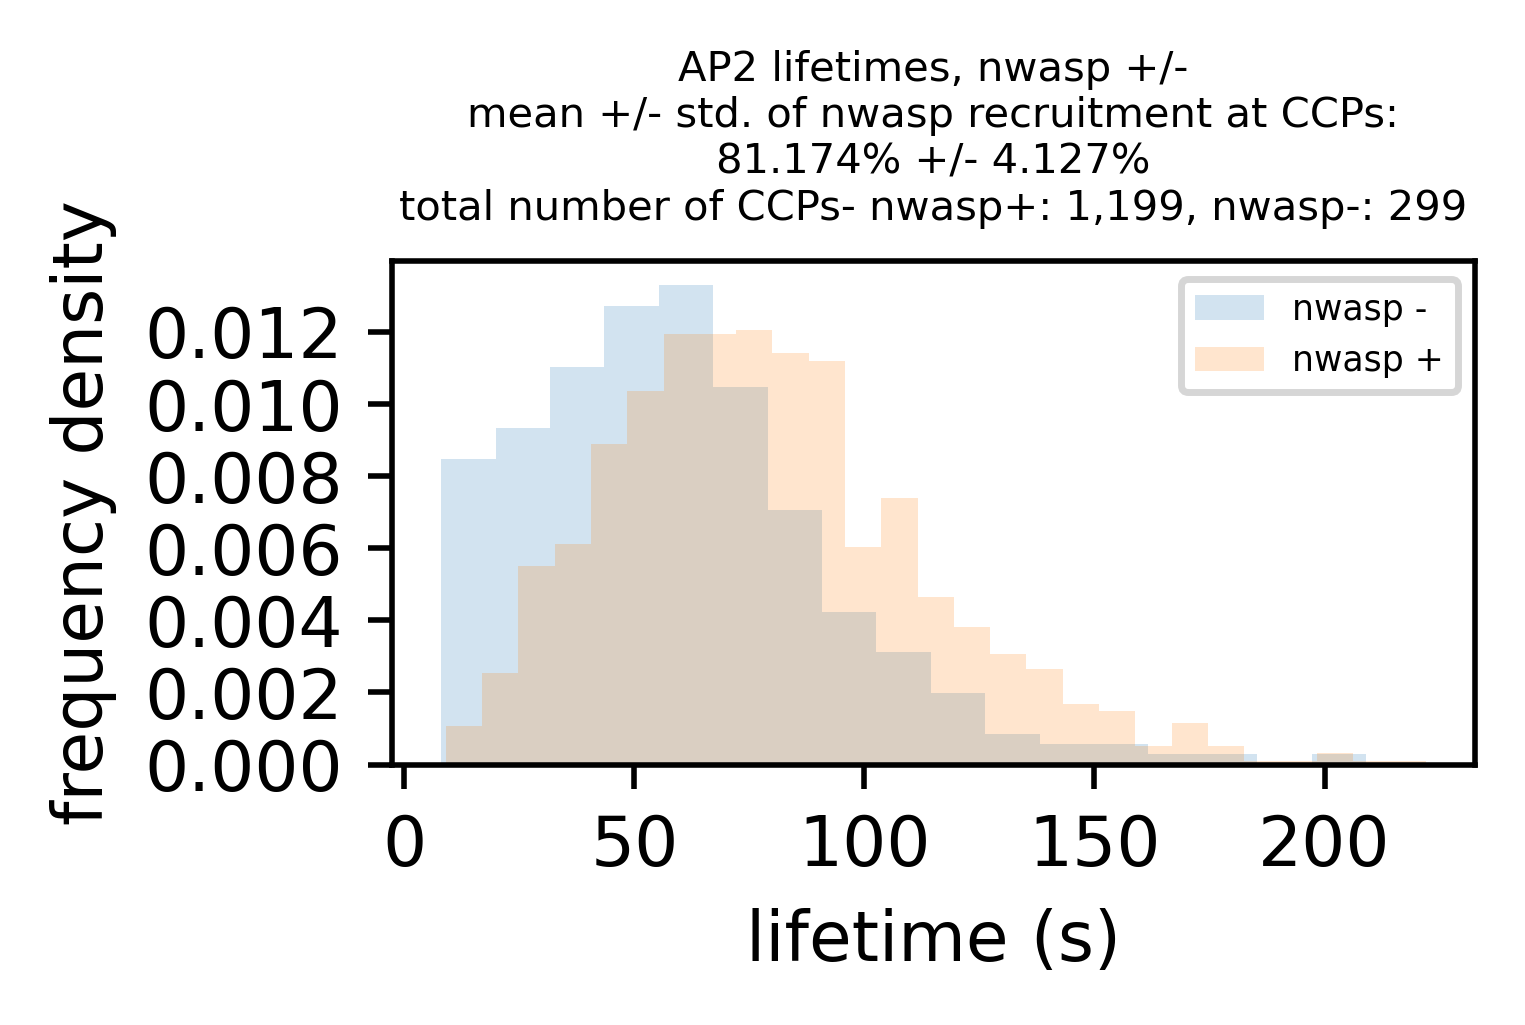

In [16]:
plt.rcParams['figure.dpi']=500
plt.rcParams['figure.figsize']=(3,2)
plt.hist(ap2_lifetime_nwasp_negative, alpha=0.2, label='nwasp -', bins='auto', density=True)
plt.hist(ap2_lifetime_nwasp_positive, alpha=0.2, label='nwasp +', bins='auto', density=True)
plt.rcParams.update({'font.size': 5})
plt.xlabel('lifetime (s)')
plt.ylabel('frequency density')
plt.title('AP2 lifetimes, nwasp +/-'+
          '\nmean +/- std. of nwasp recruitment at CCPs:\n' + 
          str(np.around(100*np.mean(merged_results['fraction_nwasp_positive']),3)) + '% +/- ' +
          str(np.around(100*np.std(merged_results['fraction_nwasp_positive']),3)) + '%' + 
          '\ntotal number of CCPs- nwasp+: ' + "{:,}".format(len(ap2_lifetime_nwasp_positive)) + 
          ', nwasp-: ' + "{:,}".format(len(ap2_lifetime_nwasp_negative)))
plt.legend()
plt.tight_layout()
# plt.savefig(unique_user_saved_outputs+'/plots/ap2lifetimes_plusminus_nwasp_histogram_density_sigdnm2peak_zeropadding.png')

# CCP lifetimes (AP2 initiation to DNM2 peak) of nwasp+/- events

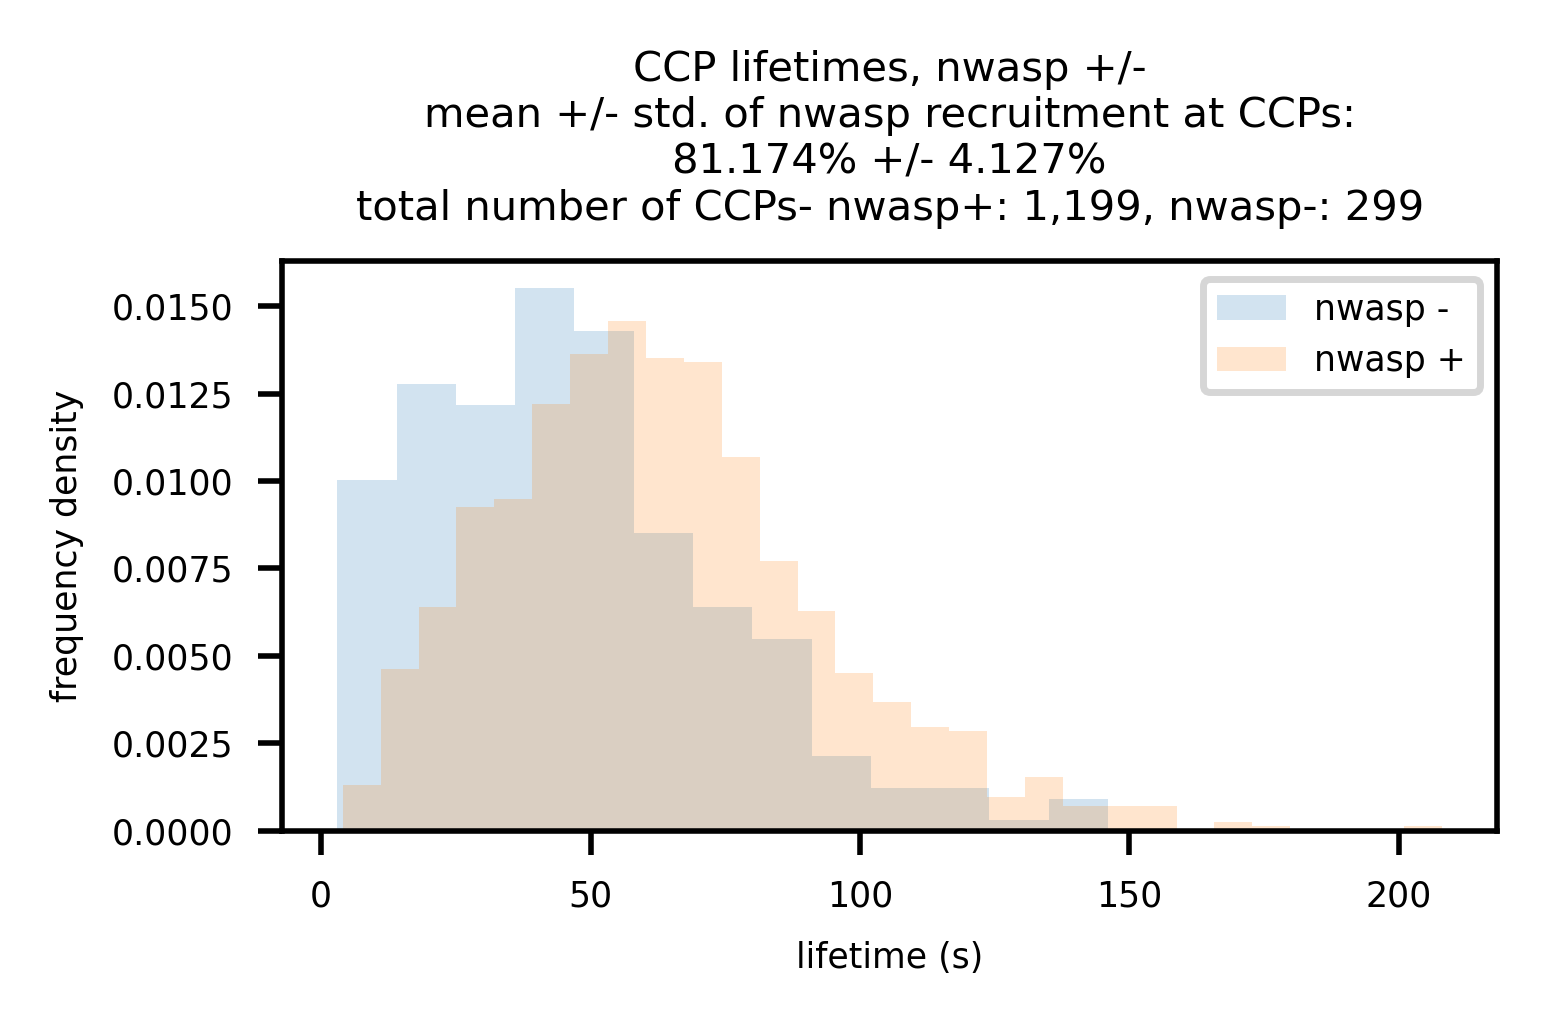

In [17]:
plt.rcParams['figure.dpi']=500
plt.rcParams['figure.figsize']=(3,2)
plt.hist(time_ap2_appearance_to_dnm2_peak_nwasp_negative, alpha=0.2, label='nwasp -', bins='auto', density=True)
plt.hist(time_ap2_appearance_to_dnm2_peak_nwasp_positive, alpha=0.2, label='nwasp +', bins='auto', density=True)
plt.rcParams.update({'font.size': 5})
plt.xlabel('lifetime (s)')
plt.ylabel('frequency density')
plt.title('CCP lifetimes, nwasp +/-'+
          '\nmean +/- std. of nwasp recruitment at CCPs:\n' + 
          str(np.around(100*np.mean(merged_results['fraction_nwasp_positive']),3)) + '% +/- ' +
          str(np.around(100*np.std(merged_results['fraction_nwasp_positive']),3)) + '%' + 
          '\ntotal number of CCPs- nwasp+: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_nwasp_positive)) + 
          ', nwasp-: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_nwasp_negative)))
plt.legend()
plt.tight_layout()
plt.savefig(path_outputs+'/plots/nwasp_ccp_lifetime_density.png')

In [18]:
np.savetxt("/Users/cynashirazinejad/Desktop/fig6d_neg.csv", time_ap2_appearance_to_dnm2_peak_nwasp_negative, delimiter=",")
np.savetxt("/Users/cynashirazinejad/Desktop/fig6d_pos.csv", time_ap2_appearance_to_dnm2_peak_nwasp_positive, delimiter=",")

In [19]:
stats.ttest_ind(time_ap2_appearance_to_dnm2_peak_nwasp_negative, time_ap2_appearance_to_dnm2_peak_nwasp_positive,equal_var=False)

Ttest_indResult(statistic=-9.508656397429101, pvalue=9.060243515598264e-20)

# histogram of nwasp lifetimes

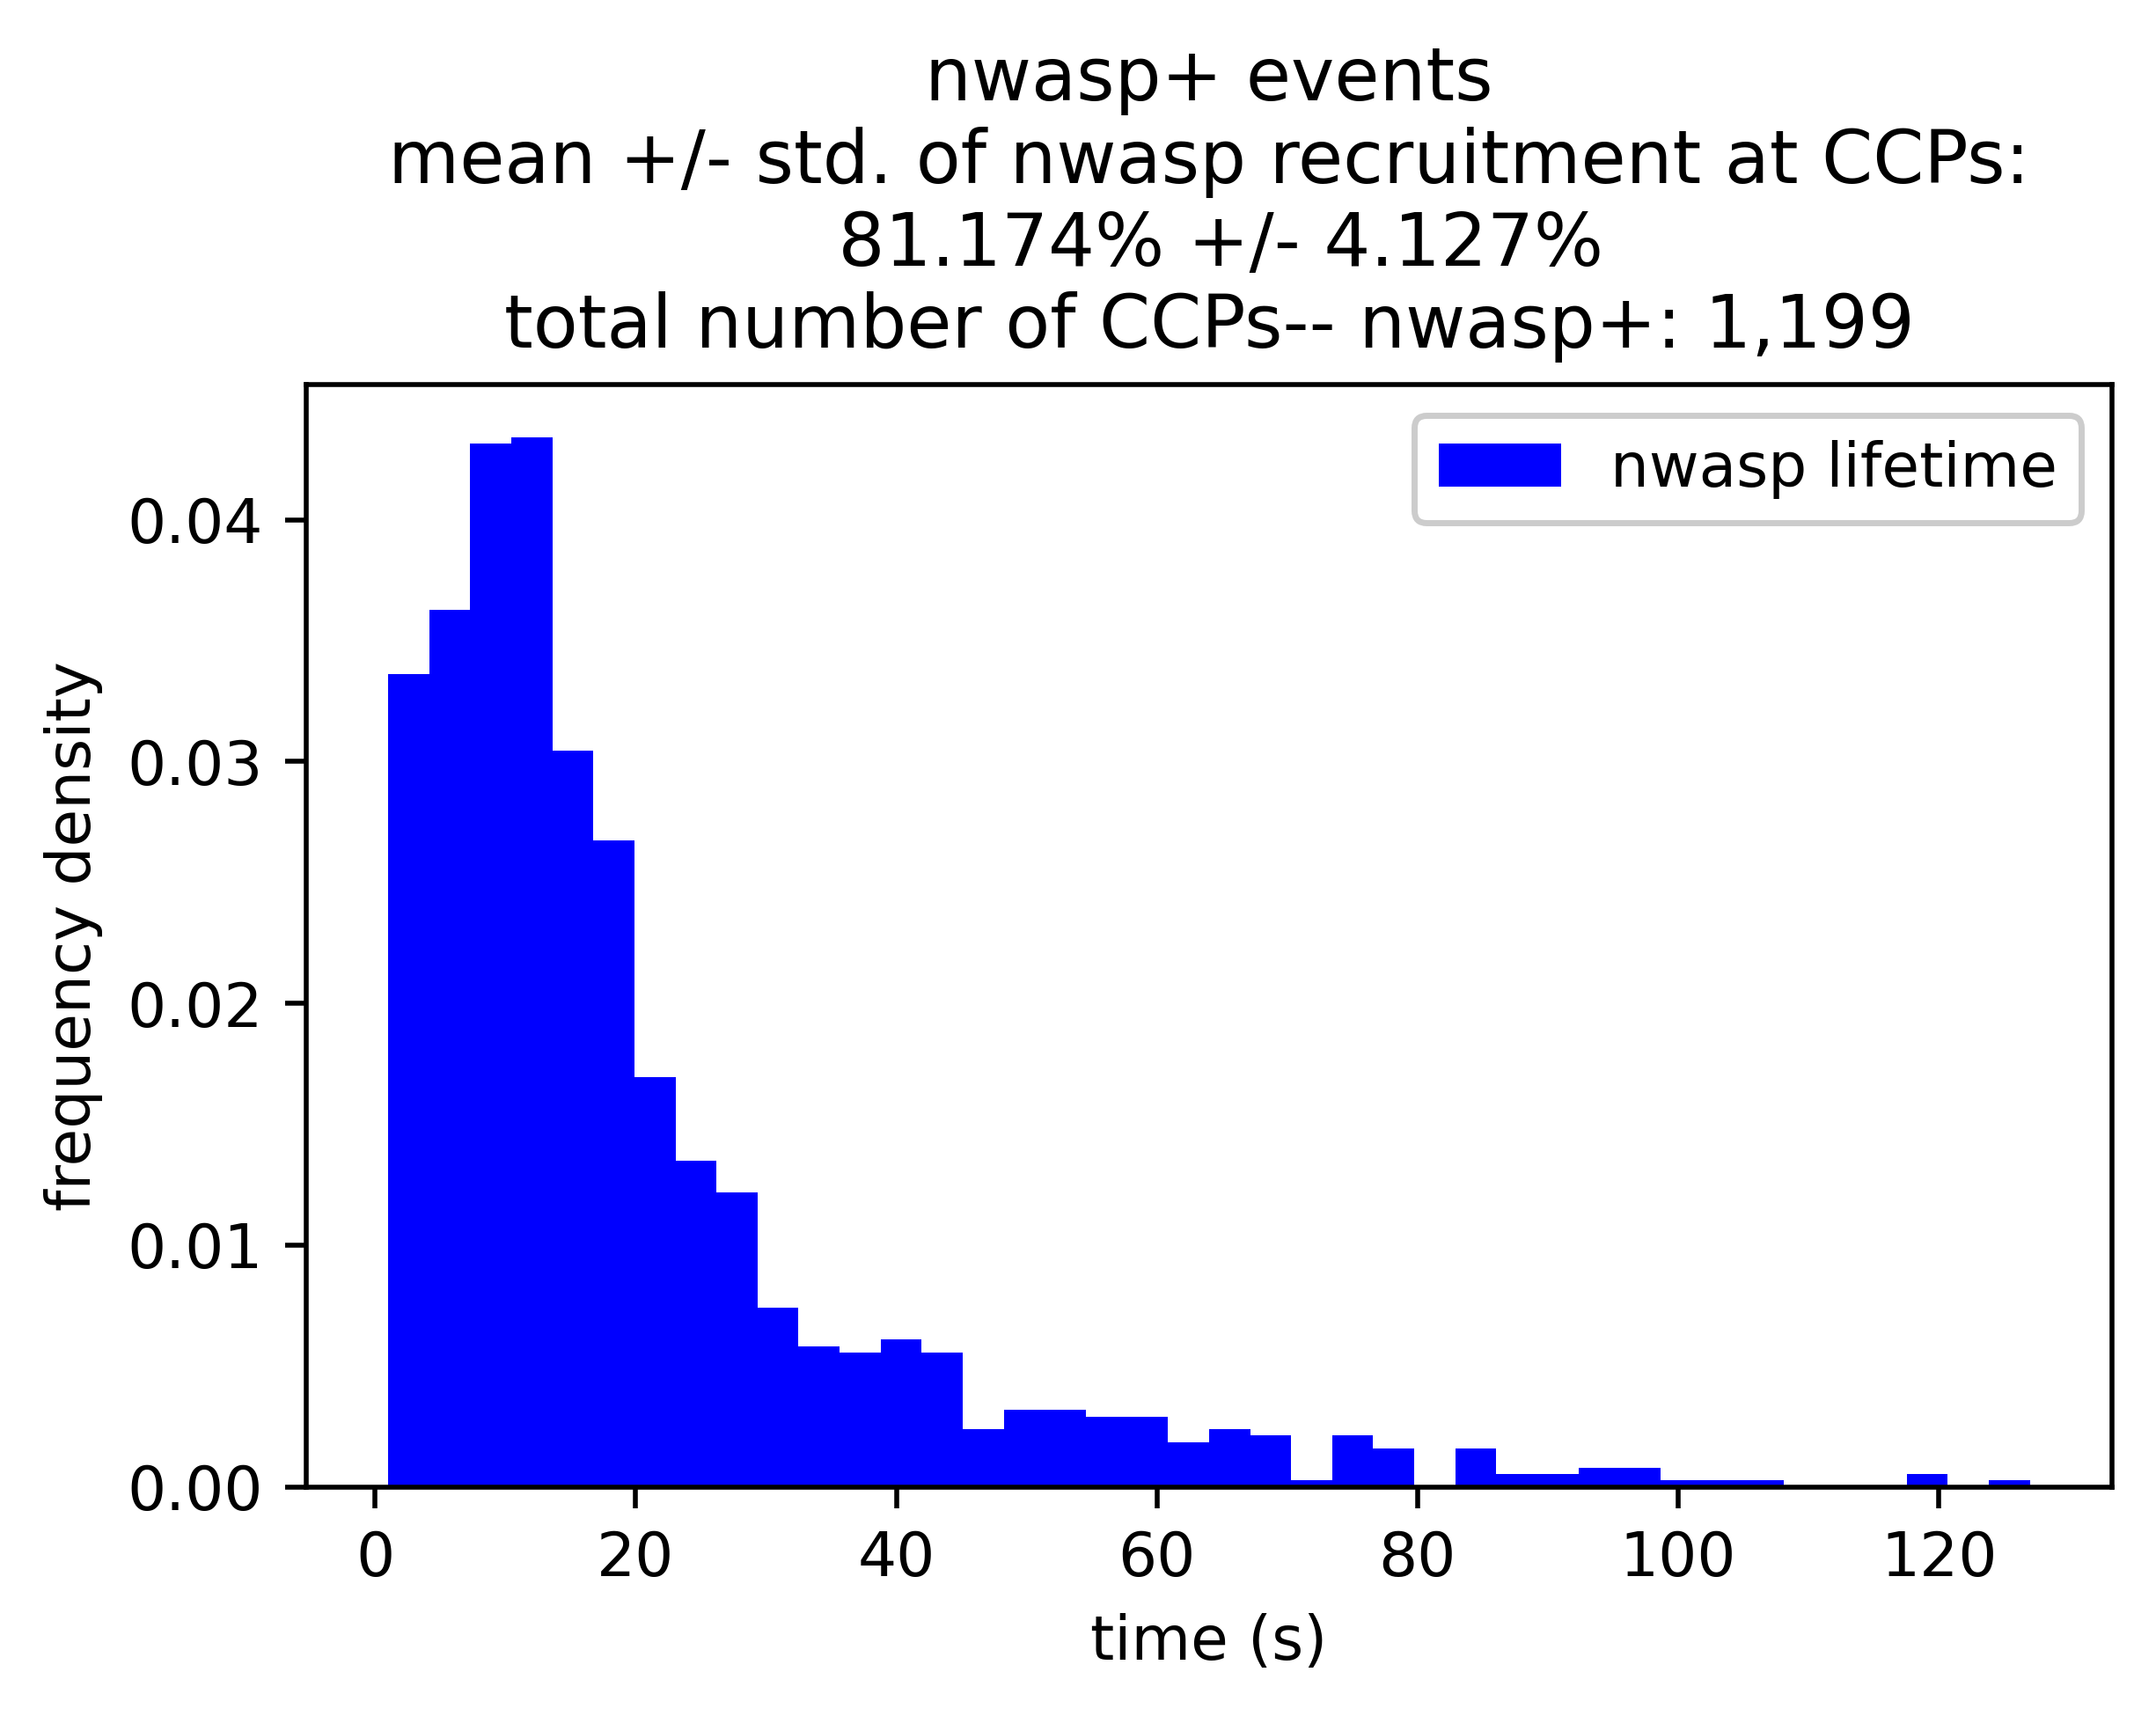

In [20]:
plt.style.use('default')

plt.rcParams["figure.dpi"]=500
plt.rcParams["figure.figsize"]=(5,4)

plt.hist(time_nwasp_appearance_to_dnm2_peak_nwasp_positive,
         bins='auto',
         alpha=1,
         density=True,
         label='nwasp lifetime',
         color='blue')

plt.legend(loc='upper right', framealpha=1)
plt.xlabel('time (s)')
plt.ylabel('frequency density')
plt.title('nwasp+ events'+
          '\nmean +/- std. of nwasp recruitment at CCPs:\n ' + 
          str(np.around(100*np.mean(merged_results['fraction_nwasp_positive']),3)) + '% +/- ' +
          str(np.around(100*np.std(merged_results['fraction_nwasp_positive']),3)) + '%' + 
          '\ntotal number of CCPs-- nwasp+: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_nwasp_positive)))
plt.tight_layout()
plt.savefig(path_outputs+'/plots/nwasp_lifetimes.png')

In [21]:
np.savetxt("/Users/cynashirazinejad/Desktop/suppfig7b.csv", time_nwasp_appearance_to_dnm2_peak_nwasp_positive, delimiter=",")

## merge amplitudes of different channels

In [22]:
channel_amplitudes_nwasp_negative = []
for i in range(len(merged_results['ch0_vectors_nwasp_negative'])):
    channel_amplitudes_nwasp_negative.append([merged_results['ch0_vectors_nwasp_negative'][i],
                                              merged_results['ch1_vectors_nwasp_negative'][i],
                                              merged_results['channel_0_1_separations_nwasp_negative'][i]])

channel_amplitudes_nwasp_positive = []
for i in range(len(merged_results['ch0_vectors_nwasp_positive'])):
    channel_amplitudes_nwasp_positive.append([merged_results['ch0_vectors_nwasp_positive'][i],
                                              merged_results['ch1_vectors_nwasp_positive'][i],
                                              merged_results['ch2_vectors_nwasp_positive'][i],
                                              merged_results['channel_0_1_separations_nwasp_positive'][i],
                                              merged_results['channel_0_2_separations_nwasp_positive'][i],
                                              merged_results['channel_1_2_separations_nwasp_positive'][i]])
channel_amplitudes_nwasp_positive = np.array(channel_amplitudes_nwasp_positive)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# cohort plots of nwasp+ CCPs

[0, 40, 100, 180]


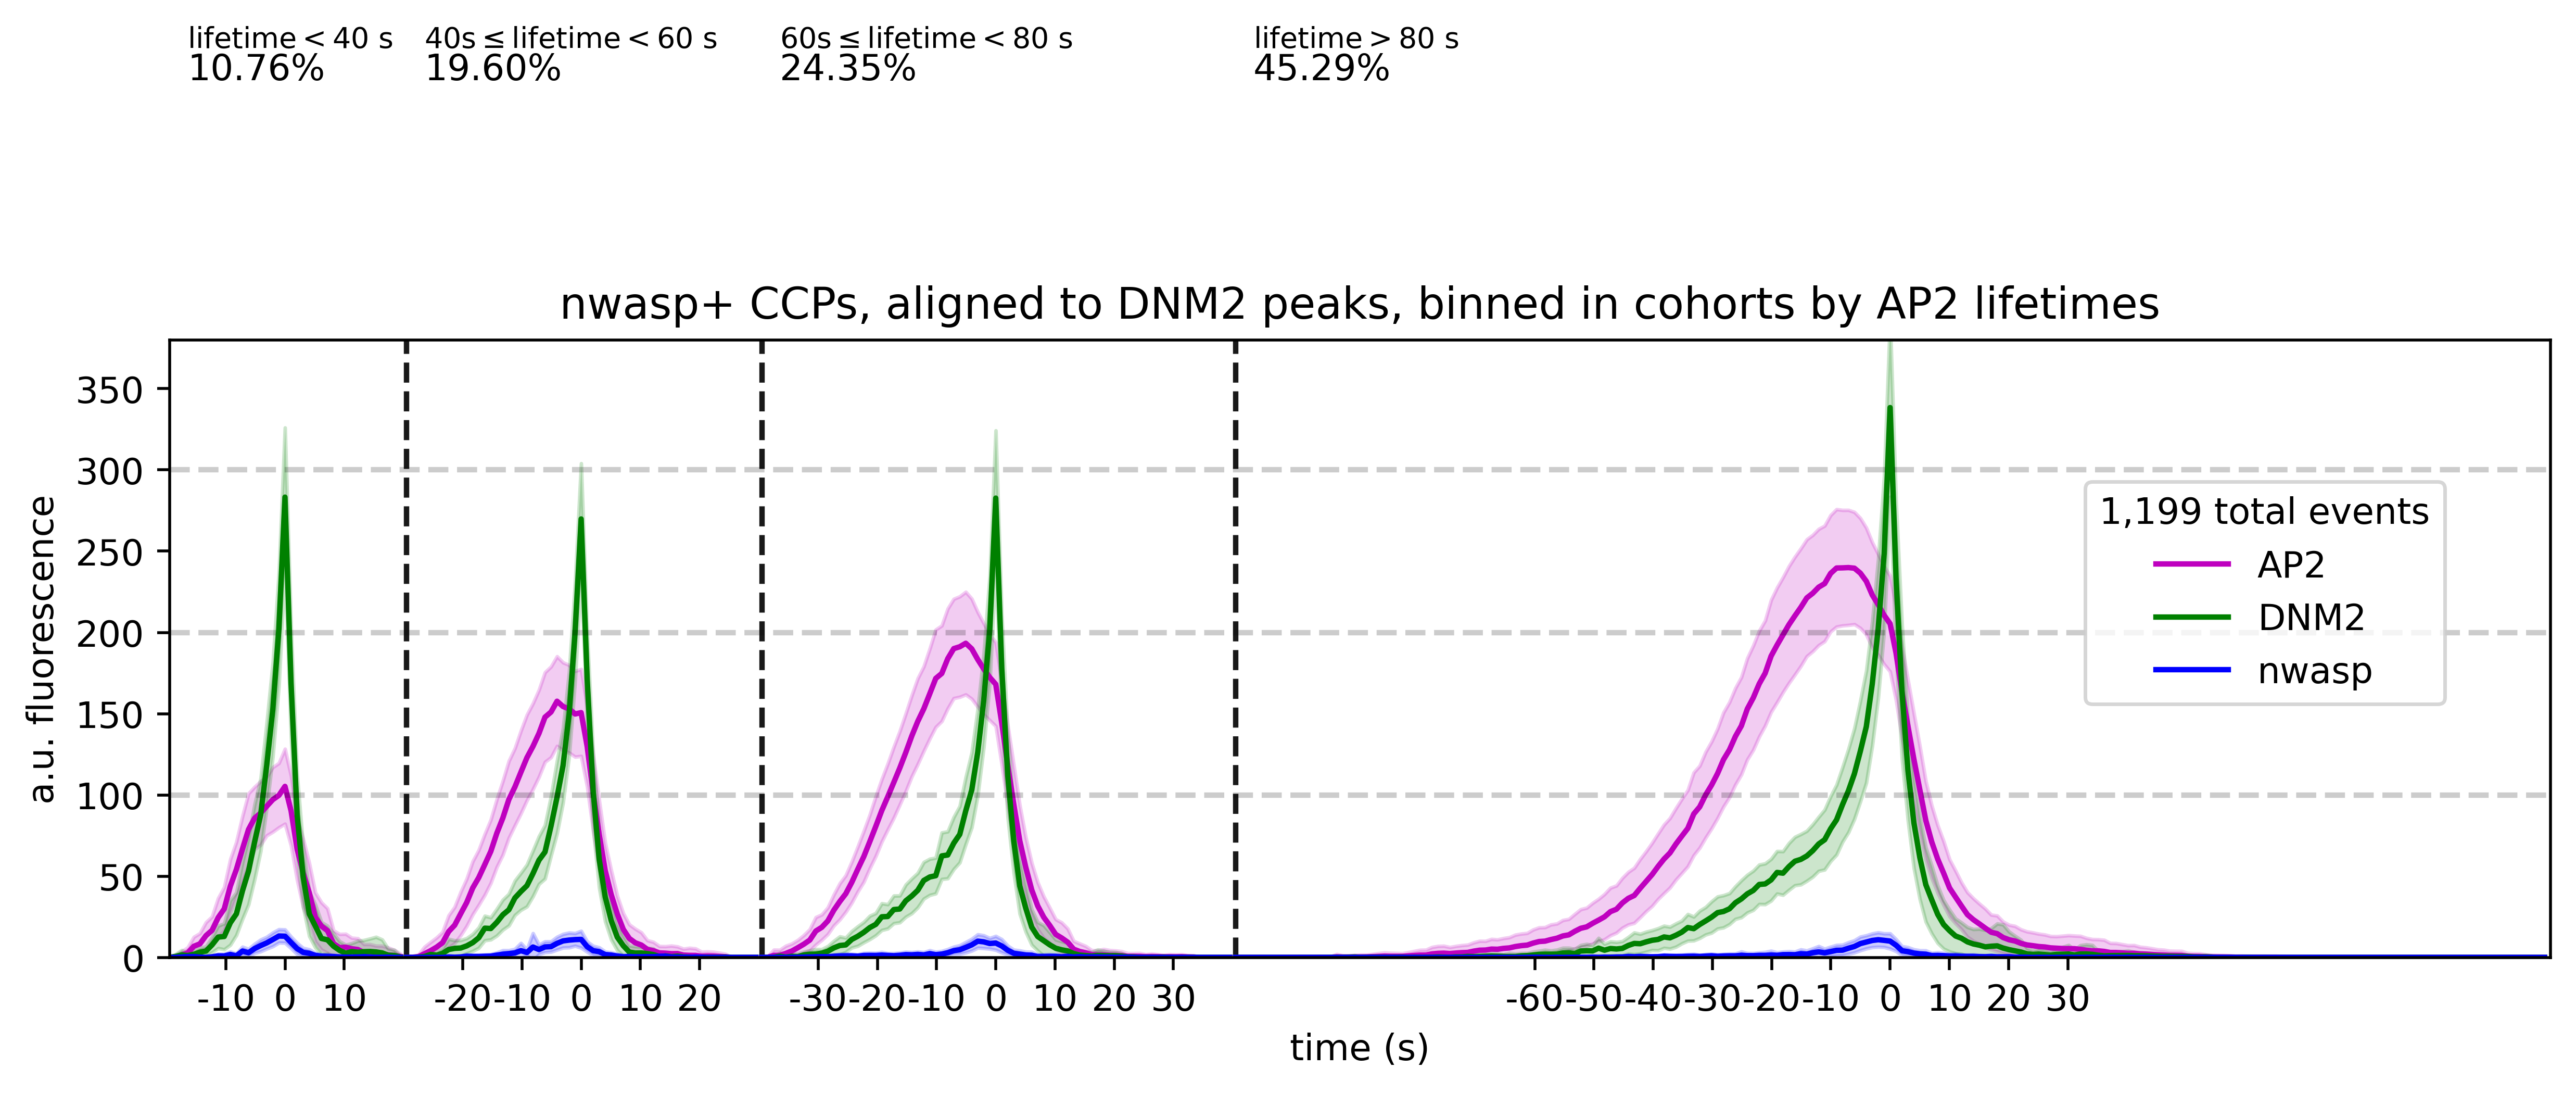

In [23]:
plt.style.use('default')

fig, axes = plt.subplots(1, 1, dpi=500, figsize=(10,5))
# axes_separation = axes.twinx()

cohorts = [[min(ap2_lifetime_nwasp_positive),40],[40,60],[60,80],[80,max(ap2_lifetime_nwasp_positive)]]

offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes], 
                                                                         channel_amplitudes_nwasp_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'nwasp'],
                                                                         ['m', 'g', 'b'])

lines_0, labels_0 = axes.get_legend_handles_labels()
axes.legend(lines_0, labels_0, 
            loc='upper center', 
            bbox_to_anchor=(0.88, 0.8), 
            title="{:,}".format(len(channel_amplitudes_nwasp_positive)) + ' total events')

y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

text_horizontal_shifts = 3
text_percentage_y = 540
text_bounds_y = 560

for i in range(len(cohorts)):

    if i==0:
        axes.text(text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
        axes.text(text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_nwasp_positive)) + '%')
    elif i==len(cohorts)-1:
        axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime >}$'+str(cohorts[i][0])+' s', fontsize=8)
        axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_nwasp_positive)) + '%')
    else:
        axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, str(cohorts[i][0])+'$\mathregular{s \leq lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
        axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_nwasp_positive)) + '%')
        
x_positions_ticks = []
x_labels_ticks = []
max_ticks_per_cohort = [[1, 1], [2, 2], [3, 3], [6, 3]]

for i in range(len(max_dnm2_cohort_indices)):
    

    num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
    num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))
    for j in range(num_ticks_before):
        
        x_labels_ticks.append(-10*(j+1))
        x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])
    
    x_labels_ticks.append(0)
    x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])
    
    for j in range(num_ticks_after):
        
        x_labels_ticks.append(10*(j+1))
        x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
axes.set_xticklabels(x_labels_ticks, minor=False)


axes.set_xlabel('time (s)') 
axes.set_ylabel('a.u. fluorescence')
axes.set_title('nwasp+ CCPs, aligned to DNM2 peaks, binned in cohorts by AP2 lifetimes')
axes.set_xlim([0,offsets[-1]+cohorts[-1][-1]])    
axes.set_ylim([0,380])  
# axes_separation.set_ylim([0,.3])
plt.tight_layout()   
plt.savefig(path_outputs+'/plots/overlaid_cohorts_nwasp_pos.png')

# nwasp+ cohort with AP2/DNM2 and AP2/nwasp separation

In [24]:
max_dnm2_cohort_indices

[19, 29, 39, 110]

In [25]:
%%capture
fig, axes = plt.subplots(1, 1, dpi=500, figsize=(6,4))
axes_separation = axes.twinx()

offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes, axes_separation], 
                                                                         channel_amplitudes_nwasp_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [3, 4], 
                                                                         ['AP2', 'DNM2', 'nwasp', 'AP2-DNM2', 'AP2-NWASP'],
                                                                         ['m', 'g', 'b', 'g', 'b'],
                                                                         line_cutoff_index=[3, 4],
                                                                         line_cutoff_regions=[[], [], [], [[0, 88-10], [88+5, 120]], [[0, 88-10], [88+5, 120]]])
shift = max_dnm2_cohort_indices[0]

In [26]:
shift

19

[0]


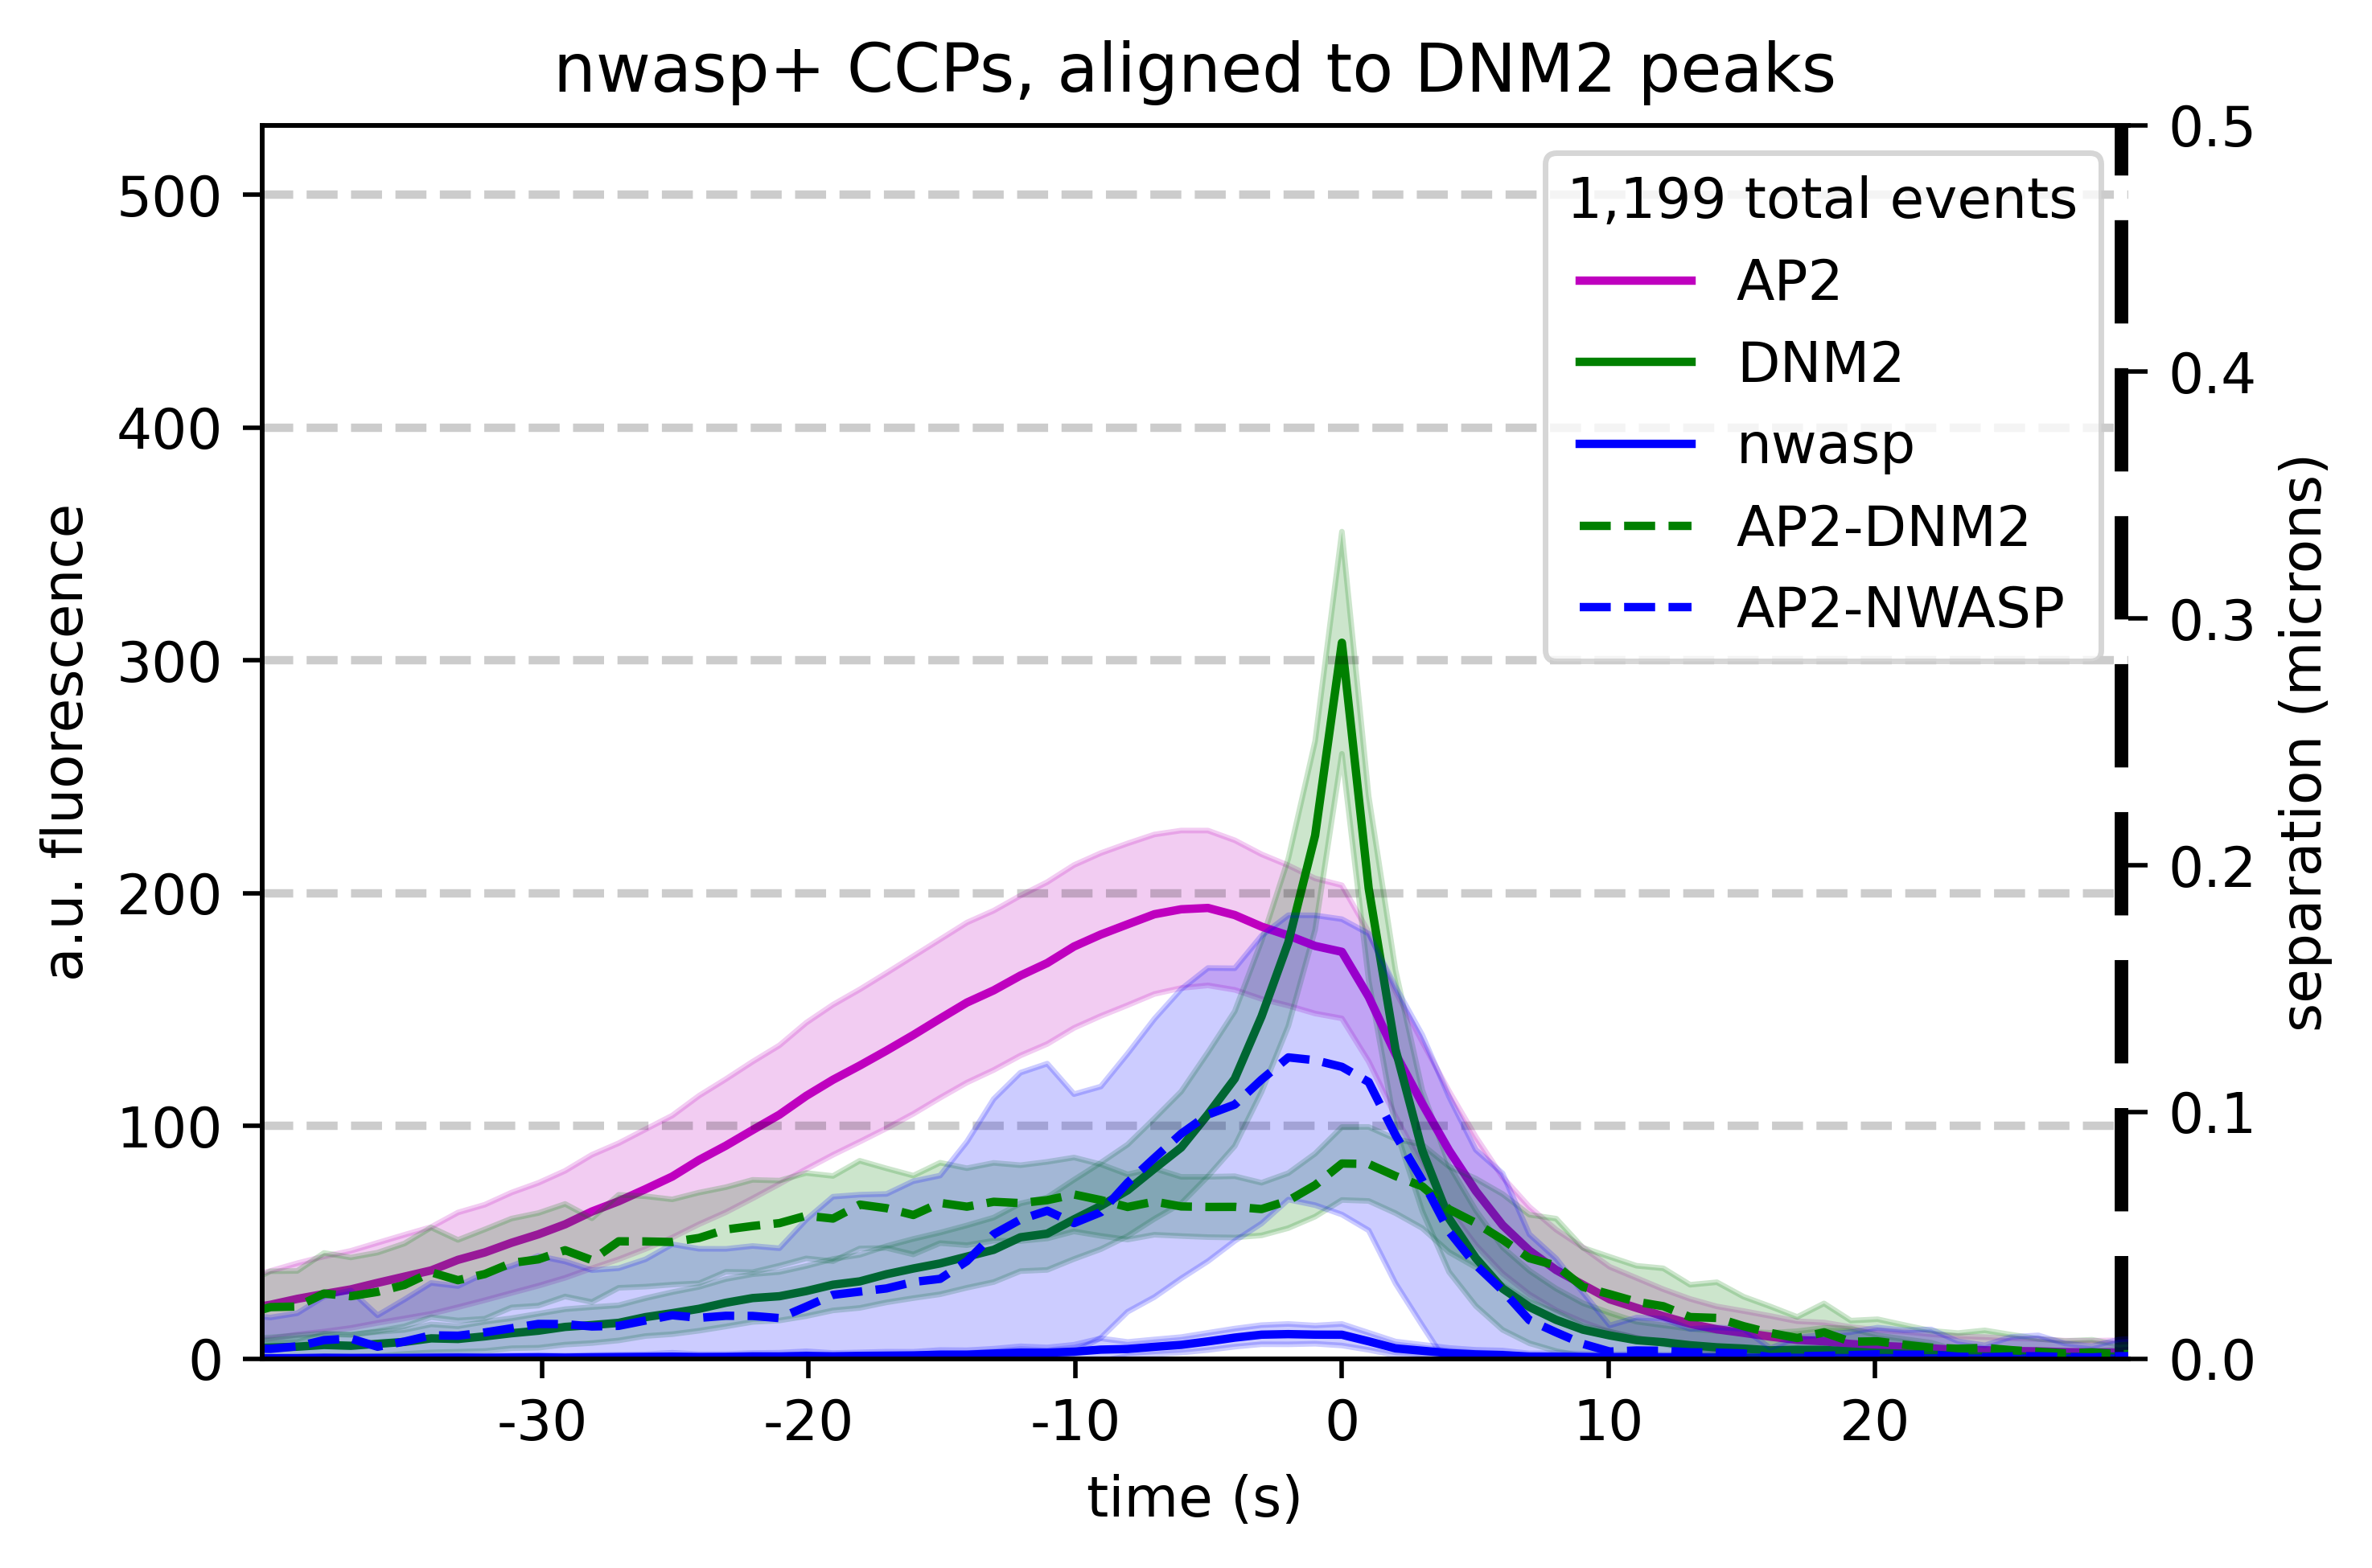

In [27]:
plt.style.use('default')
plt.rcParams['axes.spines.right'] = False

fig, axes = plt.subplots(1, 1, dpi=500, figsize=(6,4))
axes_separation = axes.twinx()

cohorts = [[min(ap2_lifetime_nwasp_positive), max(ap2_lifetime_nwasp_positive)]]


offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes, axes_separation], 
                                                                         channel_amplitudes_nwasp_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [3, 4], 
                                                                         ['AP2', 'DNM2', 'nwasp', 'AP2-DNM2', 'AP2-NWASP'],
                                                                         ['m', 'g', 'b', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], [], [[0, shift-10], [shift+5, 140]], [[0, shift-10], [shift+5, 140]]])
lines_0, labels_0 = axes.get_legend_handles_labels()
lines_1, labels_1 = axes_separation.get_legend_handles_labels()
axes.legend(lines_0+lines_1, labels_0+labels_1, 
            loc='upper right',
            title="{:,}".format(len(channel_amplitudes_nwasp_positive)) + ' total events')
y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)


x_positions_ticks = []
x_labels_ticks = []
max_ticks_per_cohort = [[3, 2]]

for i in range(len(max_dnm2_cohort_indices)):
    

    num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
    num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))
    
    for j in range(num_ticks_before):
        
        x_labels_ticks.append(-10*(j+1))
        x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])
    
    x_labels_ticks.append(0)
    x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])
    
    for j in range(num_ticks_after):
        
        x_labels_ticks.append(10*(j+1))
        x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
axes.set_xticklabels(x_labels_ticks, minor=False)


axes.set_xlabel('time (s)') 
axes.set_ylabel('a.u. fluorescence')
axes.set_title('nwasp+ CCPs, aligned to DNM2 peaks')
axes.set_xlim([70,140])    
axes.set_ylim([0,530])
axes_separation.set_ylim([0,0.5])
axes_separation.set_ylabel('separation (microns)')
axes.axvline(140, color='black', linewidth=5, linestyle='--')
plt.tight_layout()   
# plt.savefig(unique_user_saved_outputs+'/plots/fig_3d_all_overlaid_ap2dnm2_nwaspplusccps_cohorts_overlaid_separation_zeropadding_sig.png')

# nwasp+ cohort with AP2/DNM2, AP2/nwasp, DNM2/nwasp separation

[0]


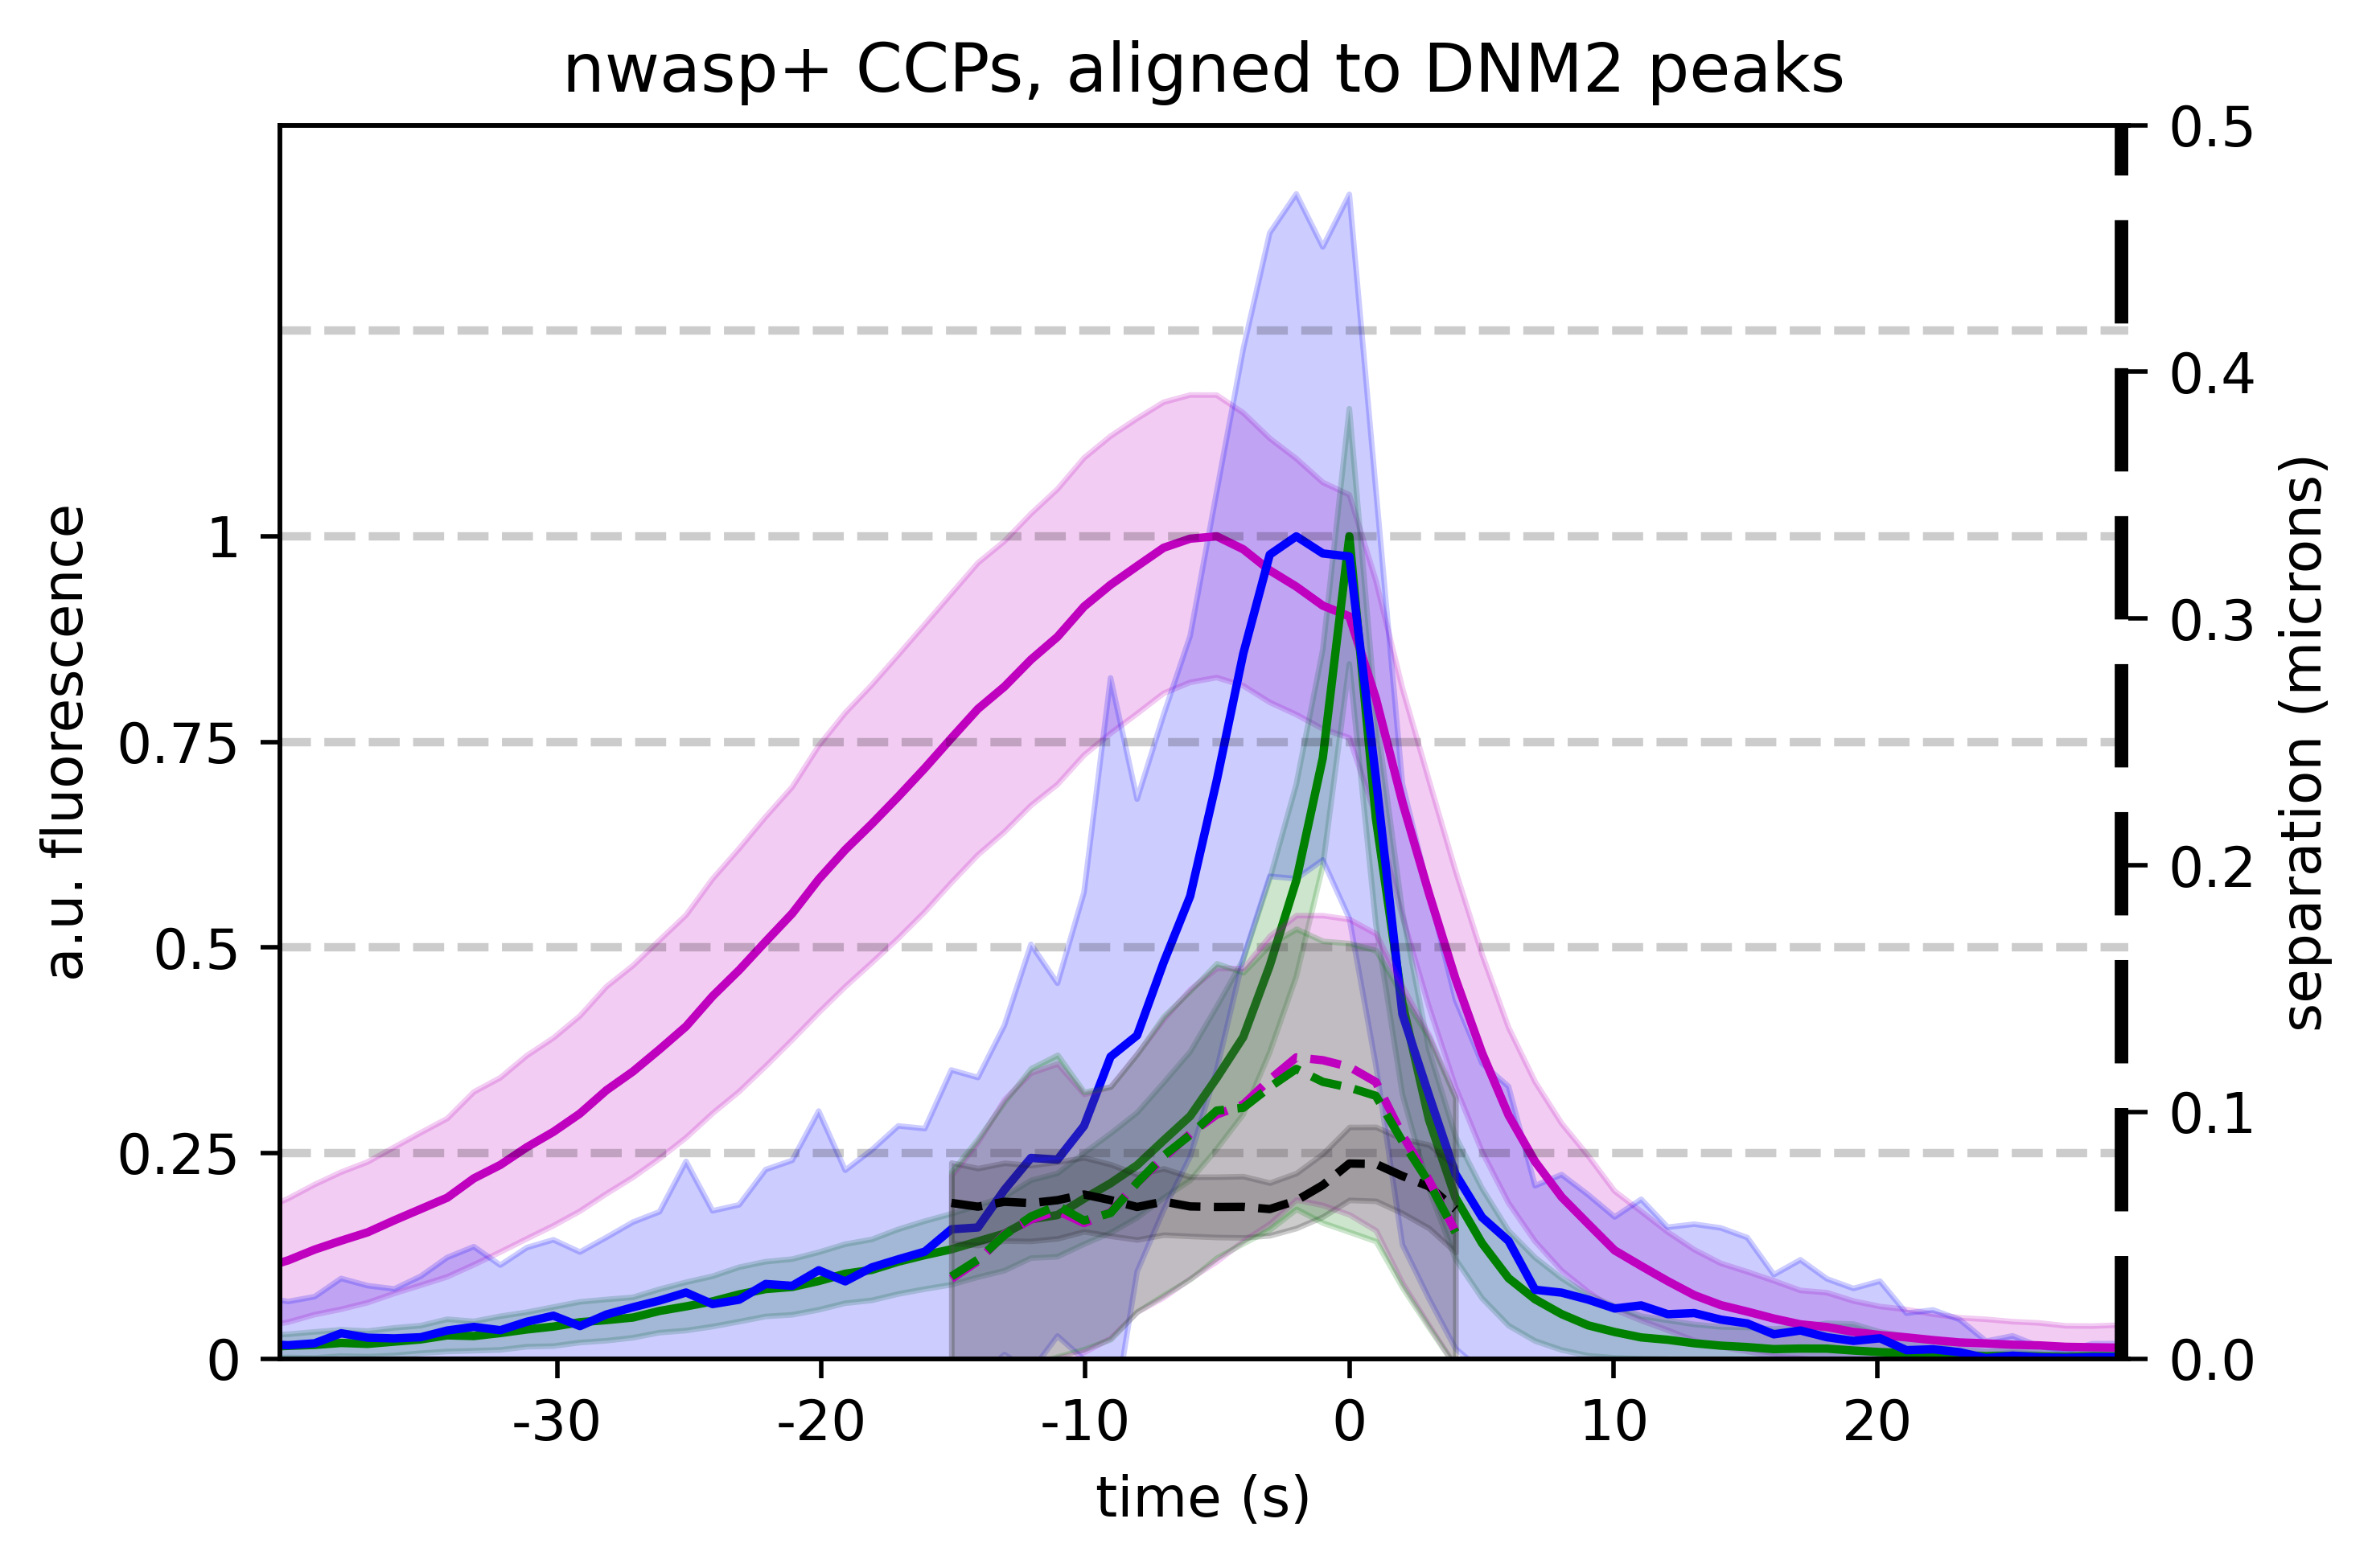

In [28]:
plt.style.use('default')
plt.rcParams['axes.spines.right'] = False

fig, axes = plt.subplots(1, 1, dpi=500, figsize=(6,4))
axes_separation = axes.twinx()

cohorts = [[min(ap2_lifetime_nwasp_positive), max(ap2_lifetime_nwasp_positive)]]

offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes, axes_separation], 
                                                                         channel_amplitudes_nwasp_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [3, 4, 5], 
                                                                         ['AP2', 'DNM2', 'nwasp', 'AP2-DNM2', 'AP2-NWASP', 'DNM2-NWASP'],
                                                                         ['m', 'g', 'b', 'k', 'm', 'g'],
                                                                         line_cutoff_index=[3,4,5],
                                                                         line_cutoff_regions=[[], [], [], [[0, 110-15], [110+5, 1000]], [[0, 110-15], [110+5, 1000]], [[0, 110-15], [110+5, 1000]]],
                                                                         norm_intensity=True)


lines_0, labels_0 = axes.get_legend_handles_labels()
lines_1, labels_1 = axes_separation.get_legend_handles_labels()
# axes.legend(lines_0+lines_1, labels_0+labels_1, 
#             loc='upper right',
#             title="{:,}".format(len(channel_amplitudes_nwasp_positive)) + ' total events')
y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)


x_positions_ticks = []
x_labels_ticks = []
max_ticks_per_cohort = [[3, 2]]

for i in range(len(max_dnm2_cohort_indices)):
    

    num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
    num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))
    
    for j in range(num_ticks_before):
        
        x_labels_ticks.append(-10*(j+1))
        x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])
    
    x_labels_ticks.append(0)
    x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])
    
    for j in range(num_ticks_after):
        
        x_labels_ticks.append(10*(j+1))
        x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
axes.set_xticklabels(x_labels_ticks, minor=False)


axes.set_xlabel('time (s)') 
axes.set_ylabel('a.u. fluorescence')
axes.set_title('nwasp+ CCPs, aligned to DNM2 peaks')
xlim=140
axes.set_xlim([70,xlim])    
axes.set_ylim([0,1.5])
axes_separation.set_ylim([0,0.5])
axes_separation.set_ylabel('separation (microns)')


y_lines = np.arange(0,1.5,0.25)

for i in range(1,len(y_lines)):
    
    axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

axes.set_xlabel('time (s)') 

# axes_separation_0.set_ylim([0,1])


axes.set_yticks([0,0.25, 0.5, 0.75, 1], minor=False)
axes.set_yticklabels([0,0.25, 0.5, 0.75, 1], minor=False)


axes.axvline(xlim, color='black', linewidth=5, linestyle='--')
plt.tight_layout()   
plt.savefig(path_outputs+'/plots/distance_overlaid_intensity_nwasp.png')

### comparing nwasp+/- aligned intensities

In [29]:
%%capture
fig, (axes_0, axes_1) = plt.subplots(2, 1, dpi=500, figsize=(6,8), gridspec_kw=dict(height_ratios=[1,1]))

cohorts = [[min(ap2_lifetime_nwasp_negative), max(ap2_lifetime_nwasp_negative)]]

_, _, max_dnm2_cohort_indices_0 = display_tracks.plot_separated_cohorts([axes_0], 
                                                                         channel_amplitudes_nwasp_negative, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1], 
                                                                         [], 
                                                                         ['AP2', 'DNM2'],
                                                                         ['m', 'g'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], [], [], []],
                                                                         horizontal_shift_index=[0, 1], 
                                                                         horizontal_shift=[-92, -92, -92])

cohorts = [[min(ap2_lifetime_nwasp_positive), max(ap2_lifetime_nwasp_positive)]]


offsets, num_in_cohort, max_dnm2_cohort_indices_1 = display_tracks.plot_separated_cohorts([axes_1], 
                                                                         channel_amplitudes_nwasp_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'nwasp'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-90, -90, -90])                                                                           

shift_0 = max_dnm2_cohort_indices_0[0]
shift_1 = max_dnm2_cohort_indices_1[0]

[0]
[0]


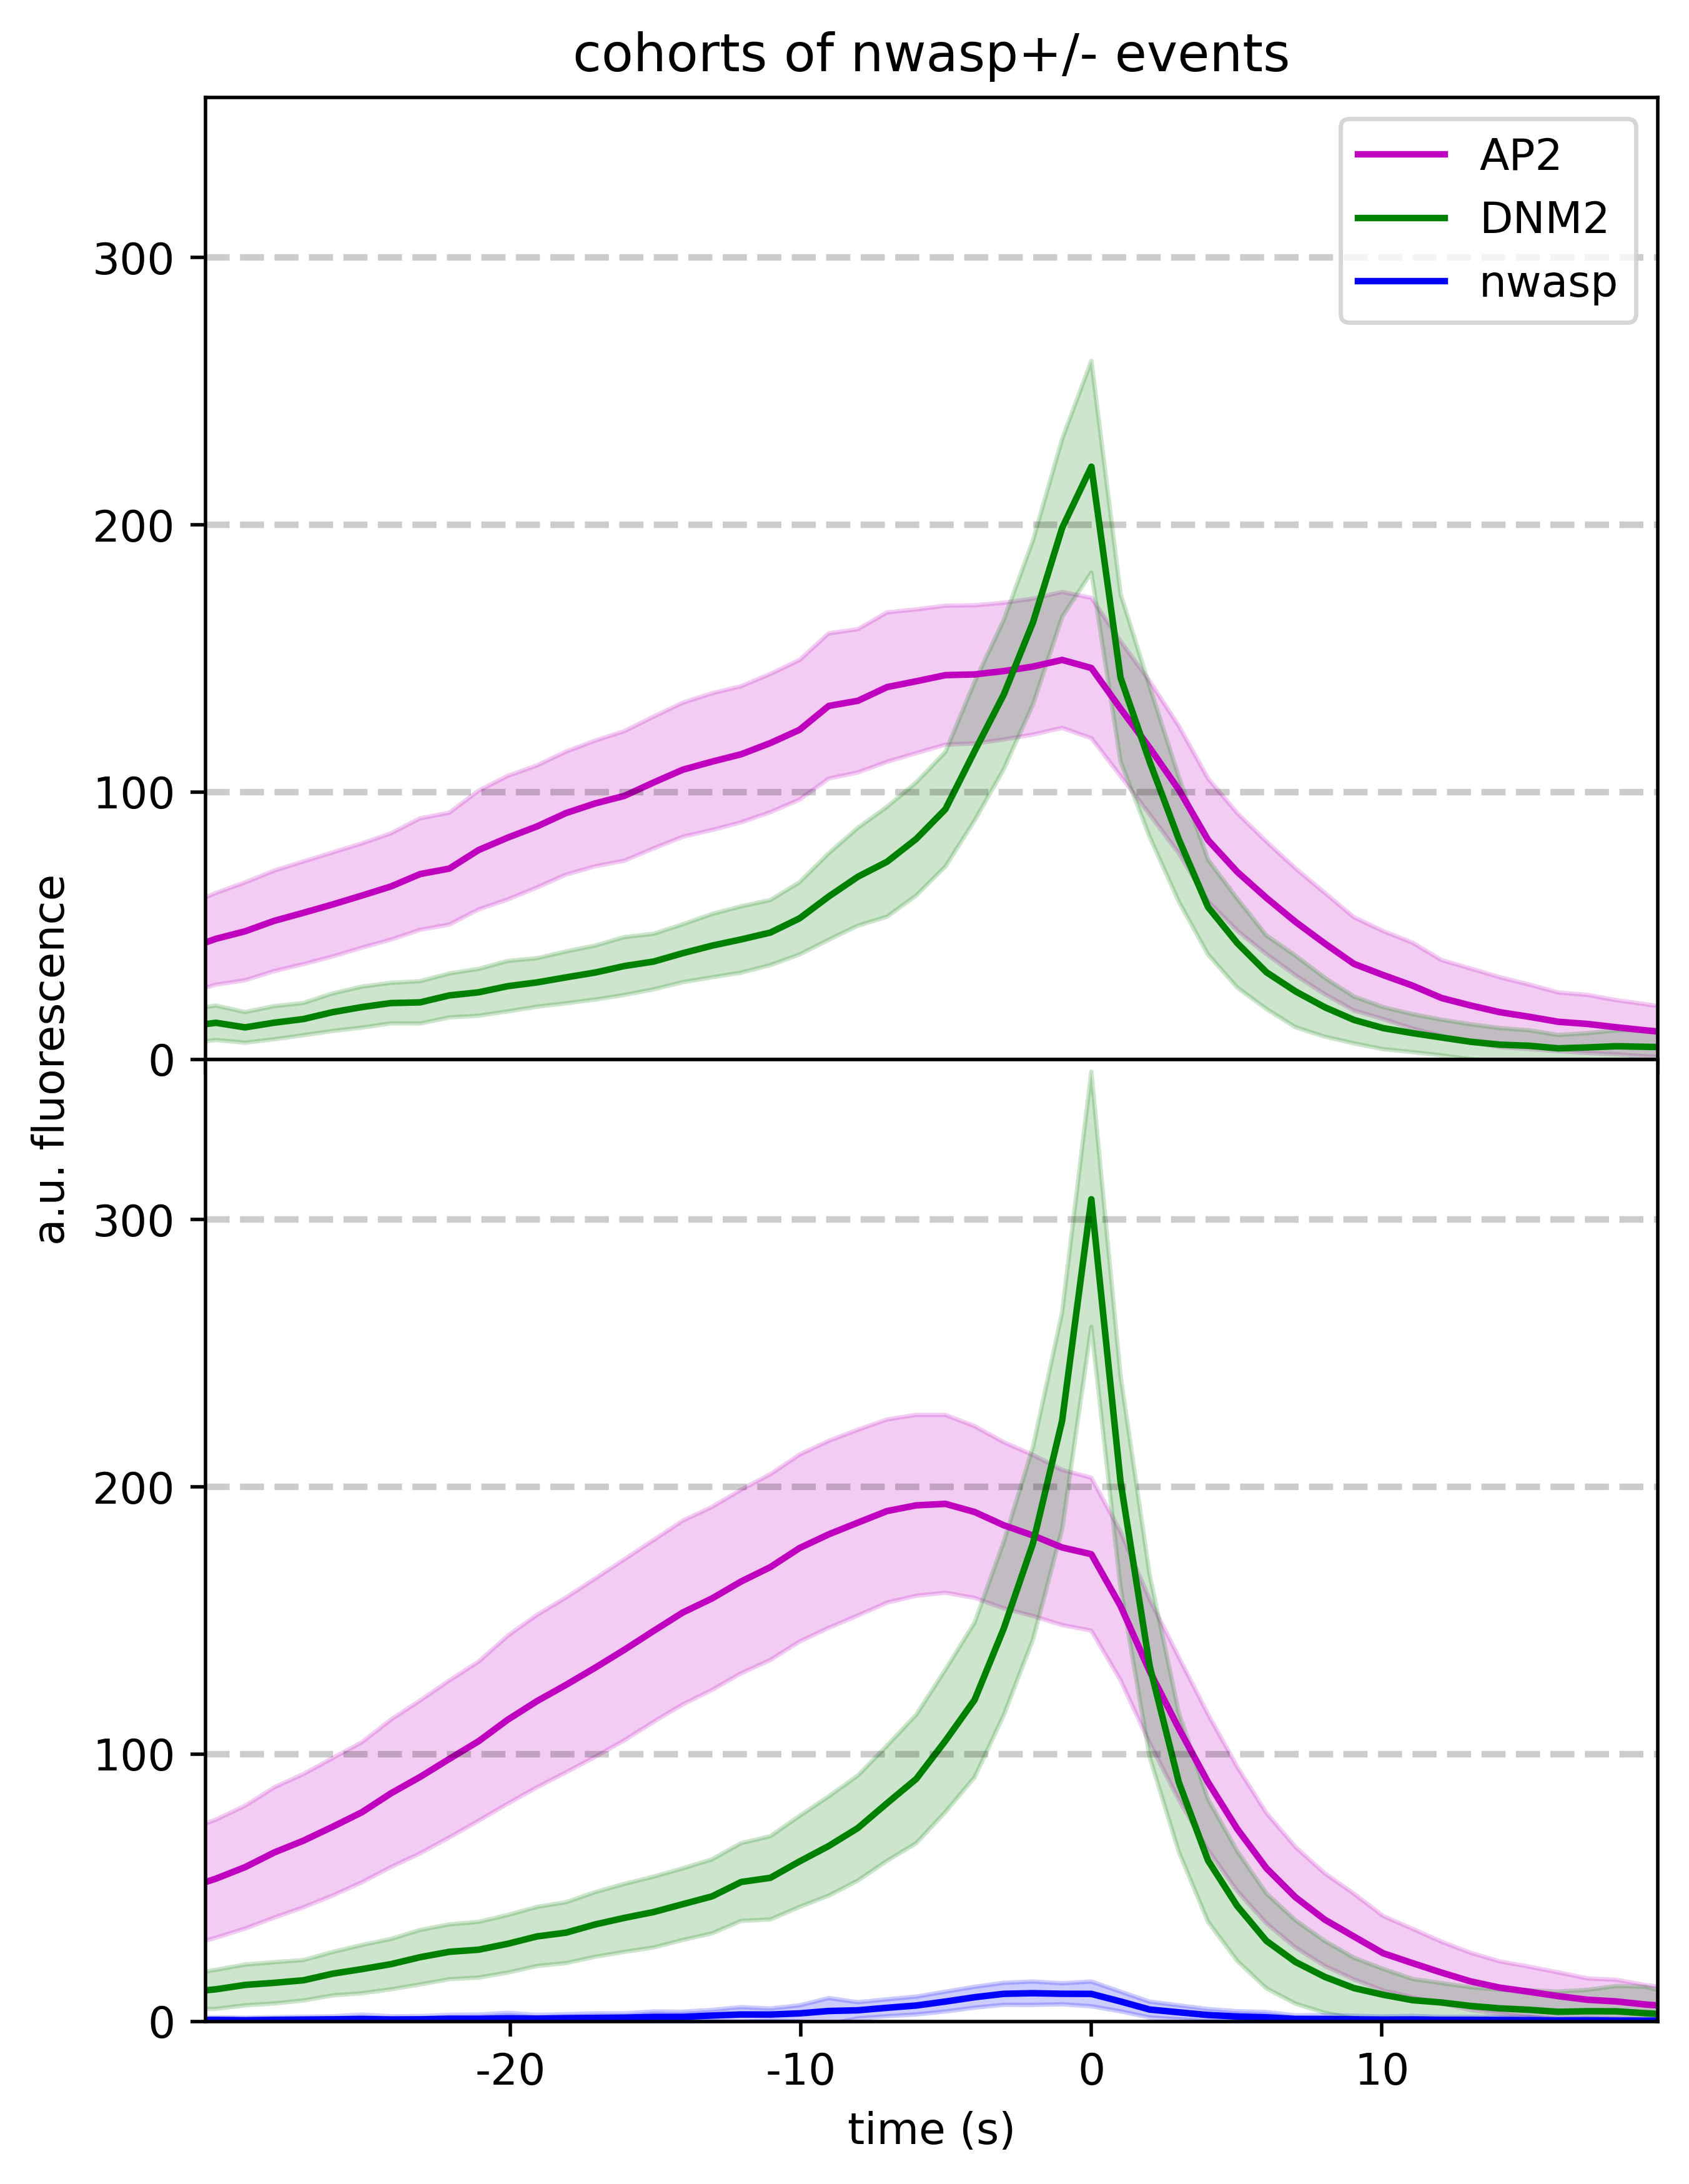

In [30]:
plt.style.use('default')
plt.rcParams['axes.spines.right'] = True

fig, (axes_0, axes_1) = plt.subplots(2, 1, dpi=500, figsize=(6,8), gridspec_kw=dict(height_ratios=[1,1]))


cohorts = [[min(ap2_lifetime_nwasp_negative), max(ap2_lifetime_nwasp_negative)]]

_, _, max_dnm2_cohort_indices_0 = display_tracks.plot_separated_cohorts([axes_0], 
                                                                         channel_amplitudes_nwasp_negative, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1], 
                                                                         [], 
                                                                         ['AP2', 'DNM2'],
                                                                         ['m', 'g'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], [], [], []],
                                                                         horizontal_shift_index=[0, 1], 
                                                                         horizontal_shift=[-shift_0, -shift_0, -shift_0])

cohorts = [[min(ap2_lifetime_nwasp_positive), max(ap2_lifetime_nwasp_positive)]]


offsets, num_in_cohort, max_dnm2_cohort_indices_1 = display_tracks.plot_separated_cohorts([axes_1], 
                                                                         channel_amplitudes_nwasp_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'nwasp'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-shift_1, -shift_1, -shift_1])                                                                           


lines_0, labels_0 = axes_1.get_legend_handles_labels()
# lines_1, labels_1 = axes_separation_0.get_legend_handles_labels()

axes_0.legend(lines_0, labels_0, 
            loc='upper right')

y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes_0.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_1.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

axes_1.set_xlabel('time (s)') 
axes_0.set_xlim([-30, 20]) 
axes_1.set_xlim([-30, 20]) 

# axes_separation_0.set_ylim([0,0.5])
# axes_separation_1.set_ylim([0,0.5])

axes_1.set_yticks([0,100,200,300,400, 500], minor=False)
axes_1.set_yticklabels([0,100,200,300, 400, 500], minor=False)
axes_0.set_yticks([0,100,200,300,400, 500], minor=False)
axes_0.set_yticklabels([0,100,200,300,400, 500], minor=False)
axes_0.set_ylim([0,360])
axes_1.set_ylim([0,360])
# axes_separation_1.set_yticks([0, 0.1, 0.2, 0.3, 0.4], minor=False)
# axes_separation_1.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], minor=False)
# axes_separation_0.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)
# axes_separation_0.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)

plt.setp(axes_0.get_xticklabels(), visible=False)
yticks = axes_1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.subplots_adjust(hspace=.0)

# axes_0.axvline(20, color='black', linewidth=5, linestyle=)
# axes_1.axvline(20, color='black', linewidth=5, linestyle='--')

axes_0.text(-36,0, 'a.u. fluorescence', rotation="vertical", va="center", fontsize=10);
# axes_0.text(24,0, 'separation (microns)', rotation=270, va="center", fontsize=10);

axes_1.set_xticks(0.5+np.array([-20, -10, 0, 10]), minor=False)
axes_1.set_xticklabels([-20, -10, 0, 10], minor=False)

axes_0.set_title('cohorts of nwasp+/- events')

plt.savefig(path_outputs+'/plots/nwasp_pos_neg.png')

# comparing nwasp+/- aligned intensities with separations

[0]
[0]


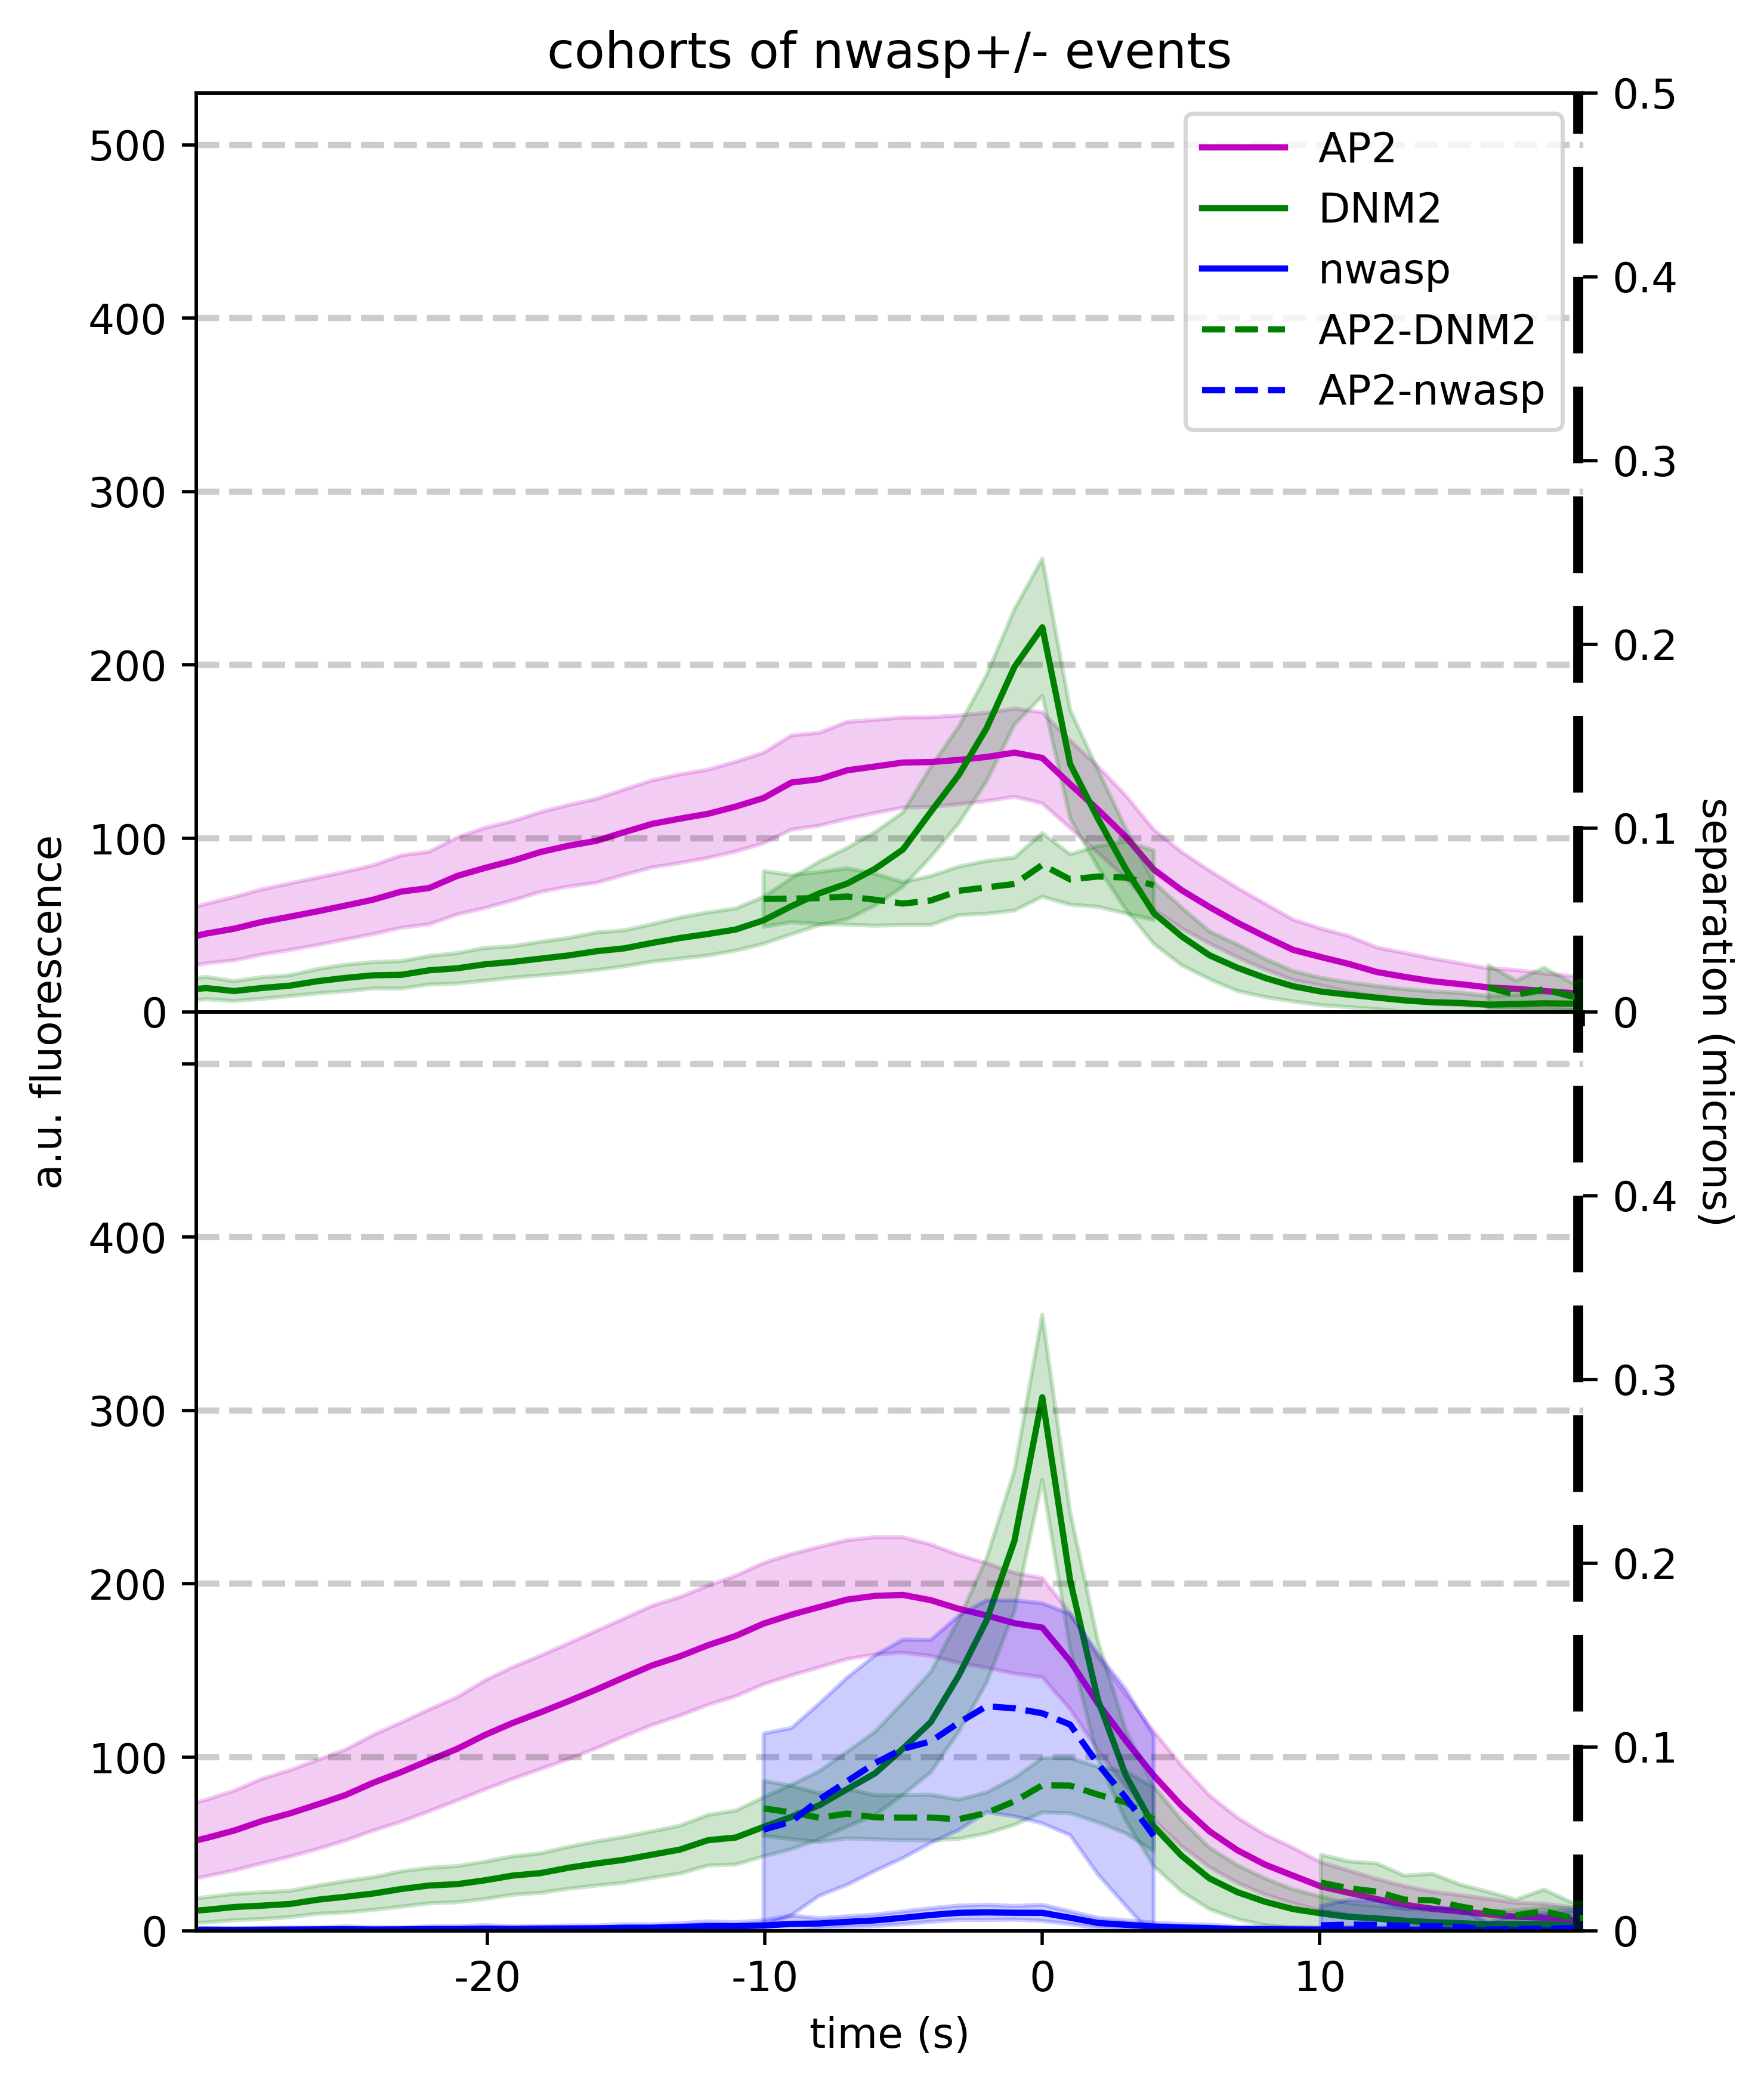

In [31]:
# %%capture

plt.style.use('default')
plt.rcParams['axes.spines.right'] = False

fig, (axes_0, axes_1) = plt.subplots(2, 1, dpi=500, figsize=(6,8), gridspec_kw=dict(height_ratios=[1,1]))
axes_separation_0 = axes_0.twinx()
axes_separation_1 = axes_1.twinx()




cohorts = [[min(ap2_lifetime_nwasp_negative), max(ap2_lifetime_nwasp_negative)]]

offsets, num_in_cohort, max_dnm2_cohort_indices_0 = display_tracks.plot_separated_cohorts([axes_0, axes_separation_0], 
                                                                         channel_amplitudes_nwasp_negative, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1], 
                                                                         [2], 
                                                                         ['AP2', 'DNM2', 'AP2-DNM2'],
                                                                         ['m', 'g', 'g'],
                                                                         line_cutoff_index=[2],
                                                                         line_cutoff_regions=[[], [], [[0, shift_0-10], [shift_0+5, 120]]],
                                                                         horizontal_shift_index=[0, 1, 2, 3, 4], 
                                                                         horizontal_shift=[-shift_0, -shift_0, -shift_0, -shift_0, -shift_0])                                                                           


cohorts = [[min(ap2_lifetime_nwasp_positive), max(ap2_lifetime_nwasp_positive)]]

_, _, max_dnm2_cohort_indices_1 = display_tracks.plot_separated_cohorts([axes_1, axes_separation_1], 
                                                                         channel_amplitudes_nwasp_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [3, 4], 
                                                                         ['AP2', 'DNM2', 'nwasp', 'AP2-DNM2', 'AP2-nwasp'],
                                                                         ['m', 'g', 'b', 'g', 'b'],
                                                                         line_cutoff_index=[3, 4],
                                                                         line_cutoff_regions=[[], [], [], [[0, shift_1-10], [shift_1+5, 120]], [[0, shift_1-10], [shift_1+5, 120]]],
                                                                         horizontal_shift_index=[0, 1, 2, 3, 4], 
                                                                         horizontal_shift=[-shift_1, -shift_1, -shift_1, -shift_1, -shift_1])


lines_0, labels_0 = axes_1.get_legend_handles_labels()
lines_1, labels_1 = axes_separation_1.get_legend_handles_labels()

axes_0.legend(lines_0+lines_1, labels_0+labels_1, 
            loc='upper right')

y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes_0.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_1.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

axes_1.set_xlabel('time (s)') 
axes_0.set_xlim([-30, 20]) 
axes_1.set_xlim([-30, 20]) 
axes_0.set_ylim([0,530])
axes_1.set_ylim([0,530])
axes_separation_0.set_ylim([0,0.5])
axes_separation_1.set_ylim([0,0.5])

axes_1.set_yticks([0,100,200,300,400, 500], minor=False)
axes_1.set_yticklabels([0,100,200,300, 400, 500], minor=False)
axes_0.set_yticks([0,100,200,300,400, 500], minor=False)
axes_0.set_yticklabels([0,100,200,300,400, 500], minor=False)

axes_separation_1.set_yticks([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_1.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_0.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)
axes_separation_0.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)

plt.setp(axes_0.get_xticklabels(), visible=False)
yticks = axes_1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.subplots_adjust(hspace=.0)

axes_0.axvline(20, color='black', linewidth=5, linestyle='--')
axes_1.axvline(20, color='black', linewidth=5, linestyle='--')

axes_0.text(-36,0, 'a.u. fluorescence', rotation="vertical", va="center", fontsize=10);
axes_0.text(24,0, 'separation (microns)', rotation=270, va="center", fontsize=10);

axes_1.set_xticks(0.5+np.array([-20, -10, 0, 10]), minor=False)
axes_1.set_xticklabels([-20, -10, 0, 10], minor=False)

axes_0.set_title('cohorts of nwasp+/- events')

plt.savefig('/Users/cynashirazinejad/Desktop/wildtype.png')

# comparing nwasp+ aligned intensities/distances as a function of quantile of ap2-nwasp separation at dnm2 peak

In [32]:
channel_amplitudes_nwasp_positive_quantiles = []
for group in set(separation_quantiles):
    
    indices_group = np.where(separation_quantiles==group)[0]
    channel_amplitudes_nwasp_positive_quantiles.append(channel_amplitudes_nwasp_positive[indices_group])    

NameError: name 'separation_quantiles' is not defined

In [ ]:
%%capture
fig, (axes_0, axes_1, axes_2, axes_3) = plt.subplots(4, 1, dpi=500, figsize=(6,16), gridspec_kw=dict(height_ratios=[1,1,1,1]))
axes_separation_0 = axes_0.twinx()
axes_separation_1 = axes_1.twinx()
axes_separation_2 = axes_2.twinx()
axes_separation_3 = axes_3.twinx()

cohorts = [[min(ap2_lifetime_nwasp_positive), max(ap2_lifetime_nwasp_positive)]]

_, _, max_dnm2_cohort_indices_0 = display_tracks.plot_separated_cohorts([axes_0], 
                                                                         channel_amplitudes_nwasp_positive_quantiles[0], 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1], 
                                                                         [], 
                                                                         ['AP2', 'DNM2'],
                                                                         ['m', 'g'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], [], [], []],
                                                                         horizontal_shift_index=[0, 1], 
                                                                         horizontal_shift=[-92, -92, -92])

_, _, max_dnm2_cohort_indices_1 = display_tracks.plot_separated_cohorts([axes_1], 
                                                                         channel_amplitudes_nwasp_positive_quantiles[1], 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'nwasp'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-90, -90, -90])                                                                           

_, _, max_dnm2_cohort_indices_2 = display_tracks.plot_separated_cohorts([axes_2], 
                                                                         channel_amplitudes_nwasp_positive_quantiles[2], 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'nwasp'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-90, -90, -90])                                                                           

_, _, max_dnm2_cohort_indices_3 = display_tracks.plot_separated_cohorts([axes_3], 
                                                                         channel_amplitudes_nwasp_positive_quantiles[3], 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'nwasp'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-90, -90, -90])                                                                           

shift_0 = max_dnm2_cohort_indices_0[0]
shift_1 = max_dnm2_cohort_indices_1[0]
shift_2 = max_dnm2_cohort_indices_2[0]
shift_3 = max_dnm2_cohort_indices_3[0]



In [ ]:
fig, (axes_0, axes_1, axes_2, axes_3) = plt.subplots(4, 1, dpi=500, figsize=(6,16), gridspec_kw=dict(height_ratios=[1,1,1,1]))
axes_separation_0 = axes_0.twinx()
axes_separation_1 = axes_1.twinx()
axes_separation_2 = axes_2.twinx()
axes_separation_3 = axes_3.twinx()

display_tracks.plot_separated_cohorts([axes_0, axes_separation_0], 
                                     channel_amplitudes_nwasp_positive_quantiles[0], 
                                     1, 
                                     cohorts, 
                                     [0, 1, 2], 
                                     [3, 4], 
                                     ['AP2', 'DNM2', 'nwasp', 'AP2-DNM2', 'AP2-nwasp'],
                                     ['m', 'g', 'b', 'g', 'b'],
                                     line_cutoff_index=[3, 4],
                                     line_cutoff_regions=[[], [], [], [[0, shift_0-10], [shift_0+5, 120]], [[0, shift_0-10], [shift_0+5, 120]]],
                                     horizontal_shift_index=[0, 1, 2, 3, 4], 
                                     horizontal_shift=[-shift_0, -shift_0, -shift_0, -shift_0, -shift_0])
                                                                        

display_tracks.plot_separated_cohorts([axes_1, axes_separation_1], 
                                     channel_amplitudes_nwasp_positive_quantiles[1], 
                                     1, 
                                     cohorts, 
                                     [0, 1, 2], 
                                     [3, 4], 
                                     ['AP2', 'DNM2', 'nwasp', 'AP2-DNM2', 'AP2-nwasp'],
                                     ['m', 'g', 'b', 'g', 'b'],
                                     line_cutoff_index=[3, 4],
                                     line_cutoff_regions=[[], [], [], [[0, shift_1-10], [shift_1+5, 120]], [[0, shift_1-10], [shift_1+5, 120]]],
                                     horizontal_shift_index=[0, 1, 2, 3, 4], 
                                     horizontal_shift=[-shift_1, -shift_1, -shift_1, -shift_1, -shift_1])


display_tracks.plot_separated_cohorts([axes_2, axes_separation_2], 
                                     channel_amplitudes_nwasp_positive_quantiles[2], 
                                     1, 
                                     cohorts, 
                                     [0, 1, 2], 
                                     [3, 4], 
                                     ['AP2', 'DNM2', 'nwasp', 'AP2-DNM2', 'AP2-nwasp'],
                                     ['m', 'g', 'b', 'g', 'b'],
                                     line_cutoff_index=[3, 4],
                                     line_cutoff_regions=[[], [], [], [[0, shift_2-10], [shift_2+5, 120]], [[0, shift_2-10], [shift_2+5, 120]]],
                                     horizontal_shift_index=[0, 1, 2, 3, 4], 
                                     horizontal_shift=[-shift_2, -shift_2, -shift_2, -shift_2, -shift_2])

display_tracks.plot_separated_cohorts([axes_3, axes_separation_3], 
                                     channel_amplitudes_nwasp_positive_quantiles[3], 
                                     1, 
                                     cohorts, 
                                     [0, 1, 2], 
                                     [3, 4], 
                                     ['AP2', 'DNM2', 'nwasp', 'AP2-DNM2', 'AP2-nwasp'],
                                     ['m', 'g', 'b', 'g', 'b'],
                                     line_cutoff_index=[3, 4],
                                     line_cutoff_regions=[[], [], [], [[0, shift_3-10], [shift_3+5, 120]], [[0, shift_3-10], [shift_3+5, 120]]],
                                     horizontal_shift_index=[0, 1, 2, 3, 4], 
                                     horizontal_shift=[-shift_3, -shift_3, -shift_3, -shift_3, -shift_3])


y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes_0.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_1.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_2.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_3.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

axes_1.set_xlabel('time (s)') 

axes_0.set_xlim([-30, 20]) 
axes_1.set_xlim([-30, 20]) 
axes_2.set_xlim([-30, 20]) 
axes_3.set_xlim([-30, 20]) 

axes_0.set_ylim([0,530])
axes_1.set_ylim([0,530])
axes_2.set_ylim([0,530])
axes_3.set_ylim([0,530])

axes_separation_0.set_ylim([0,0.5])
axes_separation_1.set_ylim([0,0.5])
axes_separation_2.set_ylim([0,0.5])
axes_separation_3.set_ylim([0,0.5])

axes_0.set_yticks([0,100,200,300,400, 500], minor=False)
axes_0.set_yticklabels([0,100,200,300,400, 500], minor=False)

axes_1.set_yticks([0,100,200,300,400, 500], minor=False)
axes_1.set_yticklabels([0,100,200,300, 400, 500], minor=False)

axes_2.set_yticks([0,100,200,300,400, 500], minor=False)
axes_2.set_yticklabels([0,100,200,300, 400, 500], minor=False)

axes_3.set_yticks([0,100,200,300,400, 500], minor=False)
axes_3.set_yticklabels([0,100,200,300, 400, 500], minor=False)


axes_separation_0.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)
axes_separation_0.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)

axes_separation_1.set_yticks([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_1.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], minor=False)

axes_separation_2.set_yticks([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_2.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], minor=False)

axes_separation_3.set_yticks([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_3.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], minor=False)


plt.setp(axes_0.get_xticklabels(), visible=False)
yticks = axes_1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.subplots_adjust(hspace=.0)
# plt.show()
axes_0.axvline(20, color='black', linewidth=5, linestyle='--')
axes_1.axvline(20, color='black', linewidth=5, linestyle='--')
axes_2.axvline(20, color='black', linewidth=5, linestyle='--')
axes_3.axvline(20, color='black', linewidth=5, linestyle='--')

axes_0.text(-36,0, 'a.u. fluorescence', rotation="vertical", va="center", fontsize=10);
axes_0.text(24,0, 'separation (microns)', rotation=270, va="center", fontsize=10);

axes_1.set_xticks(0.5+np.array([-20, -10, 0, 10]), minor=False)
axes_1.set_xticklabels([-20, -10, 0, 10], minor=False)

axes_0.set_title('cohorts of nwasp+ events')
# plt.show()
plt.savefig('/Users/cynashirazinejad/Desktop/test.png')